# Exploring Audio Processing

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 29/04/2025   | Martin | Create  | Notebook created to explore audio processing for potential Machine Learning applications. | 

# Content

* [Details on Audio](#details-on-audio)
* [Exploring Audio Data](#exploring-audio-data)

# Details on Audio

<u>Terminology</u>

* __Sampling Rate__ - Number of times per second that a sound wave's amplitude is measured and recorded. Usually measured in kHz. A higher sampling rate means more measurements are taken which leads to higher audio fidelity
* __Audio Frequency__ - (or audible frequency) The periodic vibrations whose frequency is audible to the average human - the property of sound that most determines pitch. Highest possible frequency for digitally encoded audio is half of the sampling rate
* __Bandwidth__ - Difference between the highest and lowest frequencies in an audio stream

<u>Spectrogram</u>

* Visual representations of audio - representing time, frequency and amplitude. Represents frequencies on y-axis, time on x-axis and colour as amplitude
* The amplitude represents the "volume" of that frequency - Meaning that it's more pronounced
* When data is presented in 3D plot, they may be called _waterfalls_ 

# Exploring Audio Data

In [1]:
import librosa
import librosa.display
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
# Loading audio data
audio_path = './data/train_audio/21038/iNat65519.ogg'
soundscape_path = './data/train_soundscapes/H02_20230420_074000.ogg'
SR = 32_000

audio, audio_sr = librosa.load(audio_path, sr=SR)
soundscape, ss_sr = librosa.load(soundscape_path, sr=SR)

In [3]:
# Playing the audio file
ipd.Audio(soundscape_path)

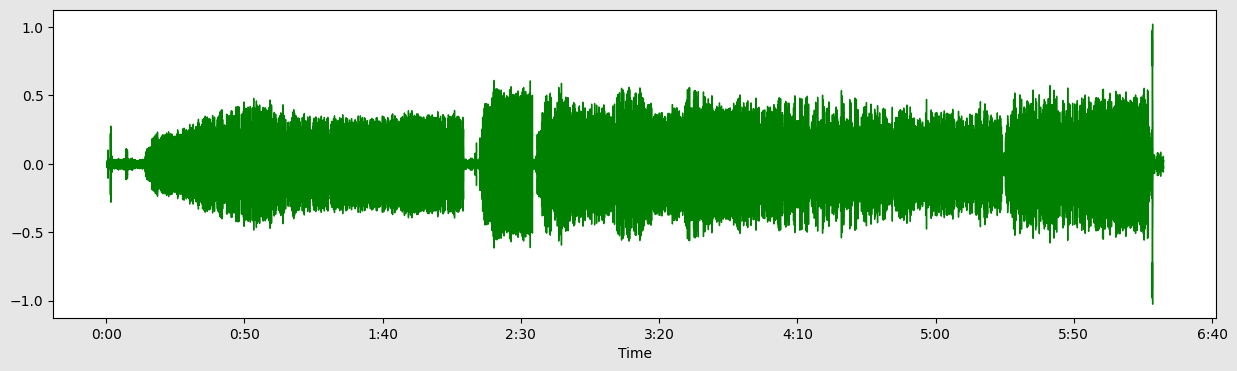

In [4]:
# Viewing data as a waveform visualisation
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(audio, sr=SR, color='green')

In [5]:
# Viewing a Spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))

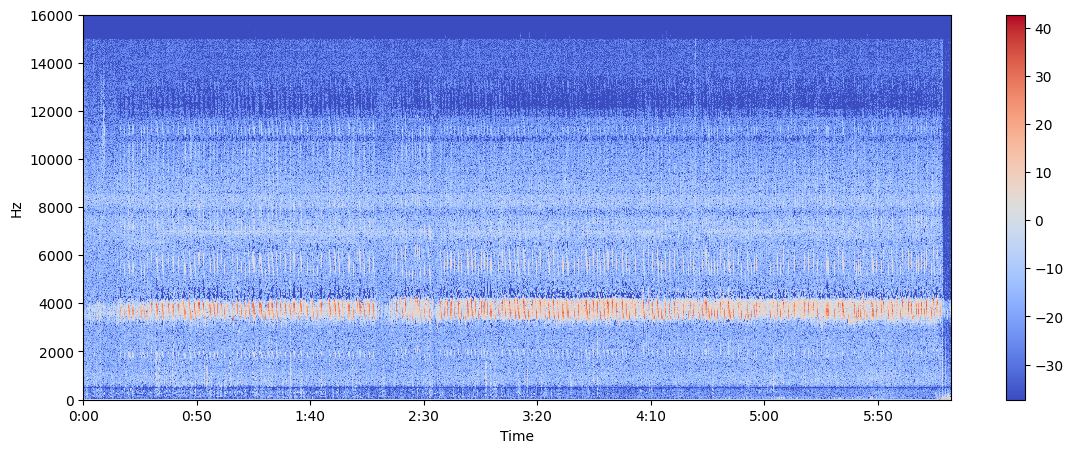

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=SR, x_axis='time', y_axis='hz')
plt.colorbar()

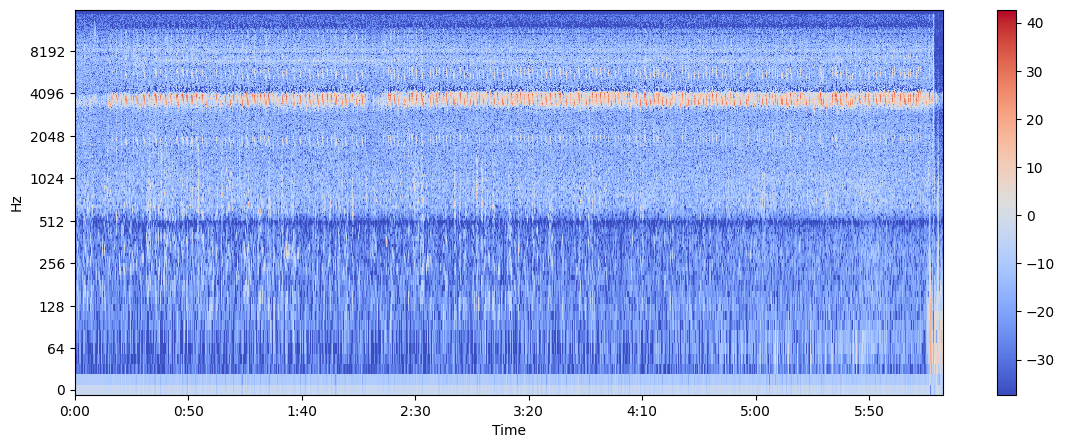

In [8]:
# Converting the frequency to log-scaled
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=SR, x_axis='time', y_axis='log')
plt.colorbar()

---

# Audio Feature Engineering

<u>List of Feature Extraction Methods</u>

1. Zero Crossing Rate
2. Spectral Centroid

## 1. Zero Crossing Rate

The rate at which signal changes from positive to zero to negative OR from negative to zero to positive.

* Each time at which the signal changes from positive to negative or back, it counts as a 1 (some mesaure only the positive to zero, or negative to zero)
* Key feature to classify percussive sounds
* Distinguish between voiced and unvoiced speech


In [11]:
zero_crossings = librosa.zero_crossings(audio)
zero_crossings

array([ True,  True,  True, ..., False, False, False])

In [14]:
sum(zero_crossings)

np.int64(3201333)

## 2. Spectral Centroid

Measure used in digital signal processing to characterise a spectrum - It indicates where the center of mass of the spectrum is located.

* Calculated as the weighted mean of the frequencies present in the signal determined using a Fourier transform
* Higher spectral centroid means more energy is concentrated in higher frequencies which means brighter or sharper sounds (vice versa)
* Represents the brightness or tonal center
  - For blues songs, it will lie somewhere near th middle of its spectrum
  - For metal songs it would lie near the end
* Distinguish between different instruments or sounds

(Feels like the audio frequencies can be distributed and then this is just the weighted mean of that distribution, like a mean/ median)

In [29]:
from sklearn.preprocessing import minmax_scale

In [22]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=SR)[0]
spectral_centroids.shape

(23894,)

In [25]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

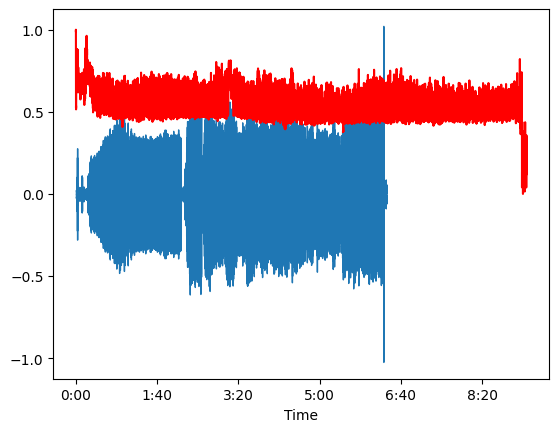

In [30]:
librosa.display.waveshow(audio, sr=SR)
plt.plot(t, minmax_scale(spectral_centroids, axis=0), color='r')

Note: Different number of spectral centroids for different lengths of audio

## 3. Spectral Rolloff